**Assignment 02**

NIM : 2440016804

Nama : Rio Pramana

Kelas : LA01

I am using the same image as in the question, I have provided the .png files in the same .zip, as well as the pdf of the result when this code/file is run

**Importing libraries**

First, I install opencv to use cv2 because I do not have it yet on this device

In [213]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Then, for this assignment, I'm using numpy, cv2, and pyplot

In [214]:
#Import libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt

**02-1 Low Pass Filtering**

In [215]:
#Load image from files
img = cv2.imread('football.png', 0)

# Do dft complex output
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
# Shift the origin to the centre of the img
dft_shift = np.fft.fftshift(dft)

# Generate the spectrum from the magnitude of the image to be shown/viewed
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

In [216]:
#Create the Gaussian low pass filter (L)
original = np.fft.fft2(img) # get the img in frequency domain
Fshift = np.fft.fftshift(original) # save the shift of the origin to the centre of img
#Save the shape of the image
row,col = img.shape
L = np.zeros((row,col), dtype=np.float32) #the filter
D0 = 10 #After some trial, I found D0 = 10 is the closest with the figure shown in the question
for u in range(row):
    for v in range(col):
        D = np.sqrt((u-row/2)**2 + (v-col/2)**2)
        L[u,v] = np.exp(-D**2/(2*D0*D0))

In [217]:
#Doing the filtering
Gshift = Fshift * L #Do the low pass filtering
#Inverse it
G = np.fft.ifftshift(Gshift)
#Get the image after low pass filtering
after_low_pass = np.abs(np.fft.ifft2(G))

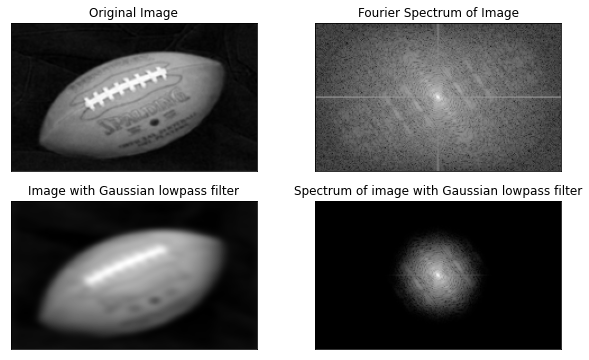

In [218]:
#Showing the results
fig = plt.figure(figsize=(10,6))

#Original image
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
#The fourier spectrum
plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Fourier Spectrum of Image'), plt.xticks([]), plt.yticks([])
#After low pass filtering
plt.subplot(223),plt.imshow(after_low_pass, cmap = 'gray')
plt.title('Image with Gaussian lowpass filter'), plt.xticks([]), plt.yticks([])
#Spectrum with lowpass filter
plt.subplot(224),plt.imshow(np.log1p(np.abs(Gshift)), cmap = 'gray')
plt.title('Spectrum of image with Gaussian lowpass filter'), plt.xticks([]), plt.yticks([])
#Show it
plt.show()

**02-2 High Pass Filtering**

High pass filtering is quite similar with low pass filtering, the difference is only on the filter, so the code will almost be identical

In [219]:
#Load image from files
img = cv2.imread('football.png', 0)

# Do dft complex output
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
# Shift the origin to the centre of the img
dft_shift = np.fft.fftshift(dft)

# Generate the spectrum from the magnitude of the image to be shown/viewed
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

#Create the Gaussian high pass filter (H)
original = np.fft.fft2(img) # get the img in frequency domain
Fshift = np.fft.fftshift(original) # save the shift of the origin to the centre of img
#Save the shape of the image
row,col = img.shape
H = 1 - L # Using the previous filter (low pass)

In [220]:
#Doing the filtering
Gshift = Fshift * H #Do the high pass filtering
#Inverse it
G = np.fft.ifftshift(Gshift)
#Get the image after high pass filtering
after_high_pass = np.abs(np.fft.ifft2(G))

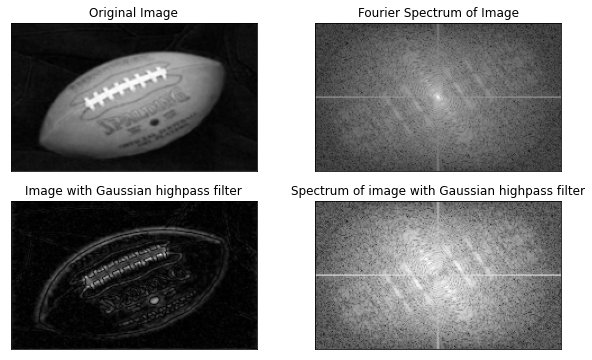

In [221]:
#Showing the results
fig = plt.figure(figsize=(10,6))

#Original image
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
#The fourier spectrum
plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Fourier Spectrum of Image'), plt.xticks([]), plt.yticks([])
#After high pass filtering
plt.subplot(223),plt.imshow(after_high_pass, cmap = 'gray')
plt.title('Image with Gaussian highpass filter'), plt.xticks([]), plt.yticks([])
#Spectrum with highpass filter
plt.subplot(224),plt.imshow(np.log1p(np.abs(Gshift)), cmap = 'gray')
plt.title('Spectrum of image with Gaussian highpass filter'), plt.xticks([]), plt.yticks([])
#Show it
plt.show()

**02-3 Butterworth Notch Filter**

To build the filter, I am using https://stackoverflow.com/questions/65483030/notch-reject-filtering-in-python as reference

In [222]:
# Defining the function to help build the filter
def notch_reject_filter(shape, d0, u_k, v_k): # All parameters must be filled
    R, C = shape
    # Initialize filter with zeros
    B = np.zeros((R, C))

    # Traverse through filter
    for u in range(0, R):
        for v in range(0, C):
            # Get euclidean distance from point D(u,v) to the center
            D_uv = np.sqrt((u - R / 2 + u_k) ** 2 + (v - C / 2 + v_k) ** 2)
            D_muv = np.sqrt((u - R / 2 - u_k) ** 2 + (v - C / 2 - v_k) ** 2)

            if D_uv <= d0 or D_muv <= d0:
                B[u, v] = 0.0
            else:
                B[u, v] = 1.0

    return B

In [223]:
#Load image from files
img = cv2.imread('football_noisy.png', 0)

# Transform the image into frequency domain and shift the origin to the center of the image
original = np.fft.fft2(img)
fshift = np.fft.fftshift(original)

# Generate the spectrum from the magnitude of the image to be shown/viewed
phase_spectrumR = np.angle(fshift)
magnitude_spectrum = 20*np.log(np.abs(fshift))

In [224]:
# Building & applying the filter to the image
img_shape = img.shape # Save the shape of the image

# In this case, there are only 6 "black points" (3 filters) needed (as shown in the figure in the question)...
# ...so, I will be only using H1-H3
H1 = notch_reject_filter(img_shape, 2, 50, 24)
H2 = notch_reject_filter(img_shape, 2, 50, -10)
H3 = notch_reject_filter(img_shape, 2, 56, 0)
# I decided to use d0 = 2 as I feel like it is the perfect size that fits the size of the noise peaks
# I got H1-H3 coordinates' above by trial and error, from the results that I got, those coordinates fits...
# ...the noise peaks the most

NotchFilter = H1*H2*H3 # We are only using H1, H2, and H3
NotchRejectCenter = fshift * NotchFilter
NotchReject = np.fft.ifftshift(NotchRejectCenter)
inverse_NotchReject = np.fft.ifft2(NotchReject)  # Compute the inverse DFT of the result

# Save the image after we apply the filter
after_bnf = np.abs(inverse_NotchReject)

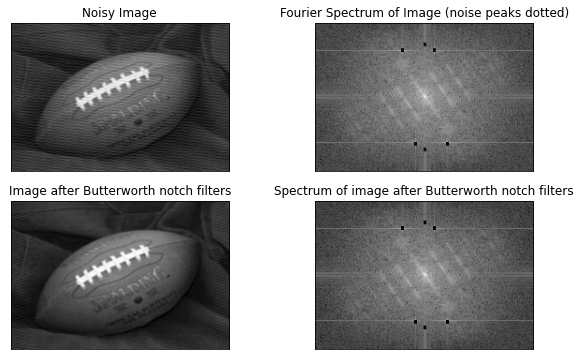

In [225]:
#Showing the results
fig = plt.figure(figsize=(10,6))

#Original noisy image
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
#The fourier spectrum
plt.subplot(222),plt.imshow(magnitude_spectrum * NotchFilter, cmap = 'gray')
plt.title('Fourier Spectrum of Image (noise peaks dotted)'), plt.xticks([]), plt.yticks([])
#After Butterworth Notch Filtering
plt.subplot(223),plt.imshow(after_bnf, cmap = 'gray')
plt.title('Image after Butterworth notch filters'), plt.xticks([]), plt.yticks([])
#Spectrum after Butterworth Notch Filtering
plt.subplot(224),plt.imshow(np.log1p(np.abs(NotchRejectCenter)), cmap = 'gray')
plt.title('Spectrum of image after Butterworth notch filters'), plt.xticks([]), plt.yticks([])
#Show it
plt.show()